<a href="https://colab.research.google.com/github/GiulioCMSanto/HDSIdent/blob/master/notebooks/SISO%20Systems/Segmentation/siso_statistical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISO Statistical Method

[HDSIdent: Historical Data Segmentation for System Identification](https://github.com/GiulioCMSanto/HDSIdent)

This notebook explores how to obtain intervals suitable for system identification through a statistical method, considering Single-Input Single-Output systems.

**NOTICE: this notebook, as well as the related dataset, is part of my masters dissertation, which was not yet published. Therefore, referencing is not permited until the work is available.**

_**Related works**_:

```
WANG, J. et al. Searching historical data segments for process
identification in feedback control loops. Computers and Chemical
Engineering, v. 112, n. 6, p. 6–16, 2018.
```
_**Related works**_:

In [ ]:
!git clone https://github.com/GiulioCMSanto/HDSIdent.git

fatal: destination path 'HDSIdent' already exists and is not an empty directory.


In [ ]:
# Change into the directory for install
%cd HDSIdent/

/content/HDSIdent/HDSIdent


In [ ]:
!python setup.py install

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

import plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

plotly.io.renderers.default = 'colab'

%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from HDSIdent.data_treatment.data_preprocessing import Preprocessing
from HDSIdent.initial_intervals.non_parametric_pettitt import PettittMethod
from HDSIdent.segmentation_methods.statistical_segmentation import MIMOStatistical

## **1. Read Data**

In [ ]:
mv_url = 'https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/water_tank/siso_simu_mv.csv'
sp_url = 'https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/water_tank/siso_simu_sp.csv'
y_url = 'https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/water_tank/siso_simu_y.csv'

In [ ]:
mv = pd.read_csv(mv_url, error_bad_lines=False, header=None)
sp = pd.read_csv(sp_url, error_bad_lines=False, header=None)
y = pd.read_csv(y_url, error_bad_lines=False, header=None)

## **2. Data Preprocessing**

In [ ]:
pp = Preprocessing(
        scaler='MinMaxScaler',
        feature_range=(-0.5,0.5),
        k=100);

In [ ]:
X, y = pp.fit_transform(X=np.concatenate([sp,mv],axis=1),y=y)

In [ ]:
sp = X[:,0]
mv = X[:,1]
y = y.values

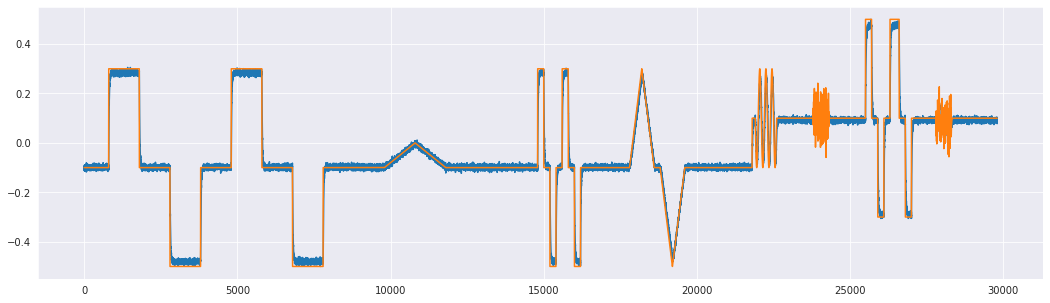

In [ ]:
plt.figure(figsize=(18,5));
plt.plot(y);
plt.plot(sp);

In [ ]:
df = pd.DataFrame()
df['SP'] = np.squeeze(sp)
df['MV'] = np.squeeze(mv)
df['Y'] = np.squeeze(y)

## **3. Initial Intervals**

In [ ]:
PM = PettittMethod(
        alpha=0.05,
        min_length_to_split=500,
        split_size=100,
        verbose=1,
        n_jobs=1
    )

pm_initial_segments = PM.fit(X=sp,
                             y=y);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: []


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [21801]


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [1800, 21801, 26800]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 9801, 21801, 26300, 26800, 27000]


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 3800, 9801, 11800, 21801, 25900, 26300, 26800, 27000, 28385]


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 2800, 3800, 6800, 9801, 10301, 11800, 18600, 21801, 25500, 25900, 26300, 26800, 27000, 27922, 28385]


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 2800, 3800, 4800, 6800, 7800, 9801, 10301, 11175, 11800, 17801, 18600, 19600, 21801, 22001, 25500, 25900, 26300, 26800, 27000, 27852, 27922, 28385]


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 10582, 11175, 11486, 11800, 15000, 17801, 18001, 18600, 18950, 19600, 21801, 22001, 22501, 25500, 25900, 26300, 26800, 27000, 27801, 27852, 27922, 28385]


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 10582, 10949, 11175, 11486, 11800, 14800, 15000, 15400, 17801, 18001, 18350, 18600, 18950, 19363, 19600, 21801, 22001, 22501, 22600, 25500, 25900, 26300, 26800, 27000, 27801, 27852, 27922, 28385]


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 10582, 10949, 11175, 11486, 11800, 14800, 15000, 15400, 16000, 17801, 18001, 18350, 18600, 18950, 19363, 19600, 21801, 22001, 22501, 22600, 25500, 25900, 26300, 26800, 27000, 27801, 27852, 27922, 28385]


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: input_0
Change-points: [800, 1800, 2800, 3800, 4800, 5800, 6800, 7800, 9801, 10301, 10582, 10949, 11175, 11486, 11800, 14800, 15000, 15400, 15600, 16000, 16200, 17801, 18001, 18350, 18600, 18950, 19363, 19600, 21801, 22001, 22501, 22600, 25500, 25900, 26300, 26800, 27000, 27801, 27852, 27922, 28385]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: []


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [21804]


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [1886, 21804, 26769]


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [852, 1886, 9816, 21804, 26289, 26769, 28369]


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [779, 852, 1802, 1886, 3878, 9816, 11782, 21804, 25899, 26289, 26769, 27078, 28369]


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [779, 852, 1802, 1886, 2815, 3878, 5921, 9816, 10331, 11782, 18678, 21804, 24231, 25899, 26289, 26769, 27078, 27935, 28369]


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [779, 852, 1802, 1886, 2815, 3792, 3878, 4805, 5921, 7877, 9816, 10075, 10331, 11186, 11782, 17796, 18678, 19617, 21804, 22675, 24231, 25492, 25899, 26289, 26769, 27078, 27877, 27935, 28369]


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [779, 852, 1802, 1886, 2815, 2934, 3792, 3878, 4805, 5799, 5921, 6827, 7877, 9816, 10075, 10331, 10602, 11186, 11468, 11782, 15960, 17796, 18438, 18678, 18989, 19617, 21804, 22014, 22675, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27805, 27877, 27935, 28369]


[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [779, 852, 1802, 1886, 2815, 2934, 3792, 3878, 4805, 4948, 5799, 5921, 6801, 6827, 7796, 7877, 9816, 10075, 10331, 10602, 10971, 11186, 11468, 11782, 15565, 15960, 16282, 17796, 18056, 18438, 18678, 18989, 19376, 19617, 21804, 22014, 22518, 22675, 23759, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27805, 27877, 27935, 28369]


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Signal: output_0
Change-points: [779, 852, 1802, 1886, 2815, 2934, 3792, 3878, 4805, 4948, 5799, 5921, 6801, 6827, 6877, 7796, 7877, 9816, 10075, 10331, 10602, 10971, 11186, 11468, 11782, 15099, 15565, 15960, 16282, 17796, 18056, 18438, 18678, 18989, 19376, 19617, 21804, 22014, 22425, 22518, 22675, 23759, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27805, 27877, 27935, 28369]
Signal: output_0
Change-points: [779, 852, 1802, 1886, 2815, 2934, 3792, 3878, 4805, 4948, 5799, 5921, 6801, 6827, 6877, 7796, 7877, 9816, 10075, 10331, 10602, 10971, 11186, 11468, 11782, 14802, 15099, 15565, 15960, 16282, 17796, 18056, 18438, 18678, 18989, 19376, 19617, 21804, 22014, 22425, 22518, 22675, 23759, 23956, 24231, 25492, 25899, 26289, 26769, 27078, 27805, 27877, 27935, 28369]


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.8s finished


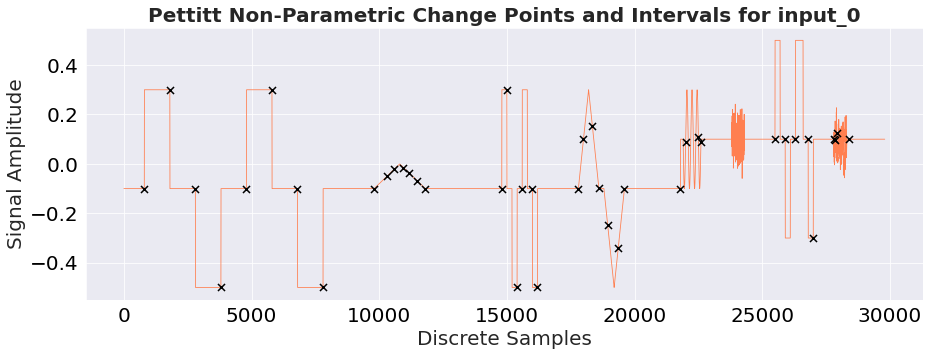

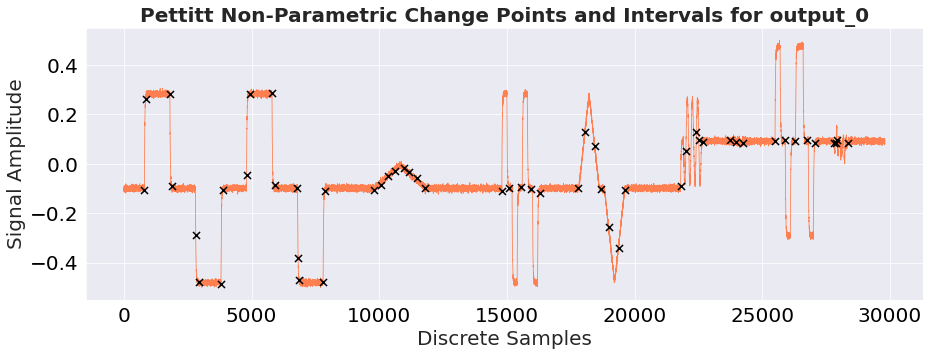

In [ ]:
PM.plot_change_points(X=sp,y=y,divided_data=False)

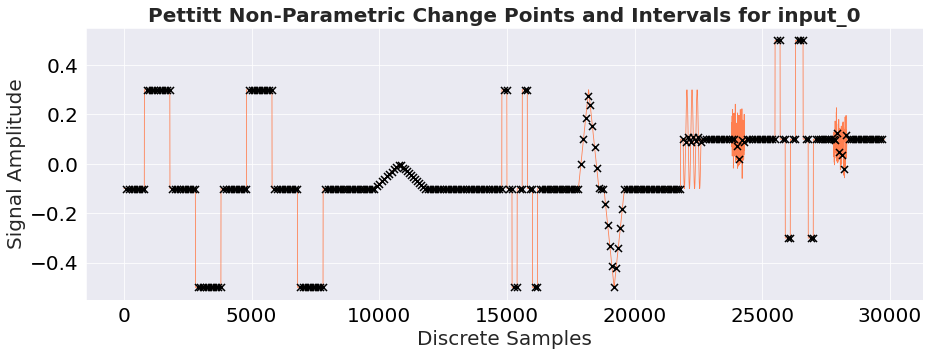

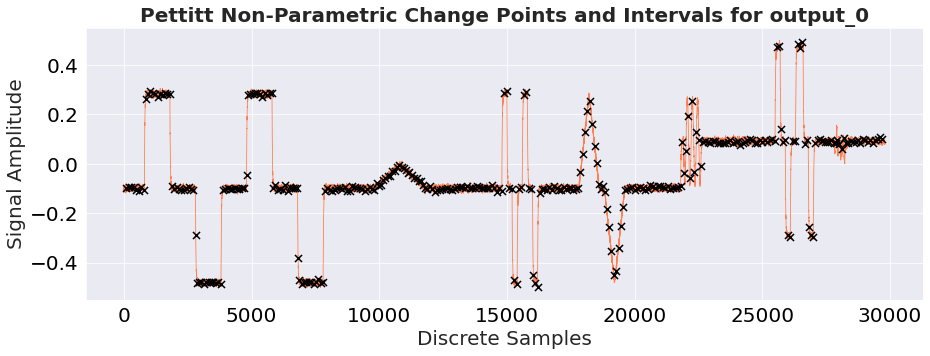

In [ ]:
PM.plot_change_points(X=sp,y=y,divided_data=True)

## **4. Statistical Segmentation**

In [ ]:
MS = MIMOStatistical(
        initial_intervals=pm_initial_segments,
        ks_critic=1.25,
        compare_means=True,
        insert_noise_sp=True,
        mean_delta=0.09,
        noise_std=0.01
     )

In [ ]:
segments = MS.fit(X=sp,y=y)

In [ ]:
indicating_sequence = np.ones(len(y))*(-0.5)
for idx in MS.final_segments:
    indicating_sequence[idx] = 0.5

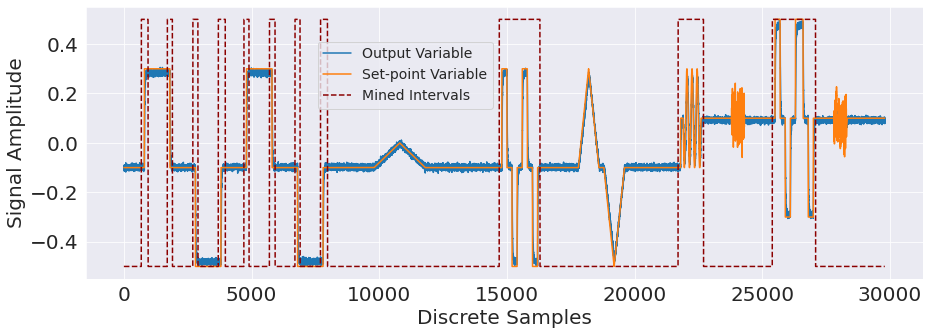

In [ ]:
plt.figure(figsize=(15,5));
plt.plot(y, label="Output Variable");
plt.plot(sp, label="Set-point Variable");
plt.plot(indicating_sequence, color='darkred', linestyle='--', label="Mined Intervals");
plt.legend(fontsize=14,bbox_to_anchor=(0.495,0.6));
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

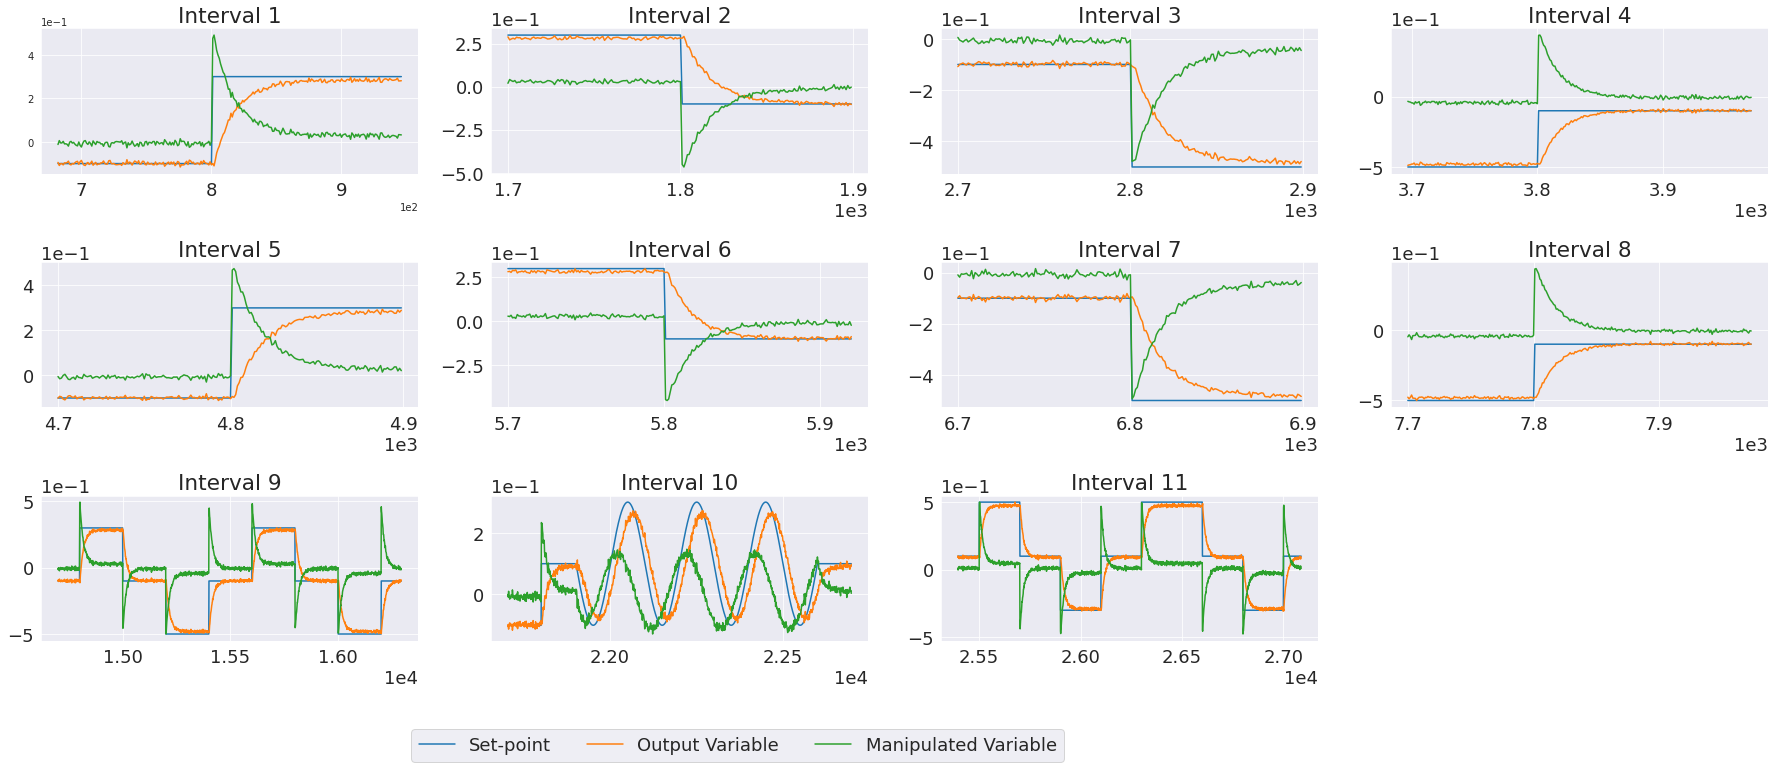

In [ ]:
plt.figure(figsize=(25,10));

plt.subplot(3,4,1);
plt.rc('font', size=18);
plt.plot(df[['SP']].iloc[MS.final_segments[0]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[0]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[0]], label="Manipulated Variable");
plt.title("Interval 1");
plt.xticks(fontsize=18);
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);
    
plt.subplot(3,4,2);
plt.plot(df[['SP']].iloc[MS.final_segments[1]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[1]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[1]], label="Manipulated Variable");
plt.title("Interval 2");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,3);
plt.plot(df[['SP']].iloc[MS.final_segments[2]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[2]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[2]], label="Manipulated Variable");
plt.title("Interval 3");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,4);
plt.plot(df[['SP']].iloc[MS.final_segments[3]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[3]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[3]], label="Manipulated Variable");
plt.title("Interval 4");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,5);
plt.plot(df[['SP']].iloc[MS.final_segments[4]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[4]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[4]], label="Manipulated Variable");
plt.title("Interval 5");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,6);
plt.plot(df[['SP']].iloc[MS.final_segments[5]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[5]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[5]], label="Manipulated Variable");
plt.title("Interval 6");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,7);
plt.plot(df[['SP']].iloc[MS.final_segments[6]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[6]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[6]], label="Manipulated Variable");
plt.title("Interval 7");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,8);
plt.plot(df[['SP']].iloc[MS.final_segments[7]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[7]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[7]], label="Manipulated Variable");
plt.title("Interval 8");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,9);
plt.plot(df[['SP']].iloc[MS.final_segments[8]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[8]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[8]], label="Manipulated Variable");
plt.title("Interval 9");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,10);
plt.plot(df[['SP']].iloc[MS.final_segments[9]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[9]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[9]], label="Manipulated Variable");
plt.title("Interval 10");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.subplot(3,4,11);
plt.plot(df[['SP']].iloc[MS.final_segments[10]], label="Set-point");
plt.plot(df[['Y']].iloc[MS.final_segments[10]], label="Output Variable");
plt.plot(df[['MV']].iloc[MS.final_segments[10]], label="Manipulated Variable");
plt.title("Interval 11");
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
plt.tick_params(axis="x",direction="in", pad=8);
plt.locator_params(axis='y', nbins=4);
plt.locator_params(axis='x', nbins=4);
plt.rc('font', size=18);

plt.tight_layout();

leg = plt.legend(bbox_to_anchor=(0.35, -0.55),
                 fancybox=True,
                 shadow=False, 
                 ncol=9);

## **5. What is Under the Hood**

### **5.1 Kolmogorov-Smirnov (Lilliefors) Test**

#### **5.1.1 Cumulative Distribution for a Noisy Interval**

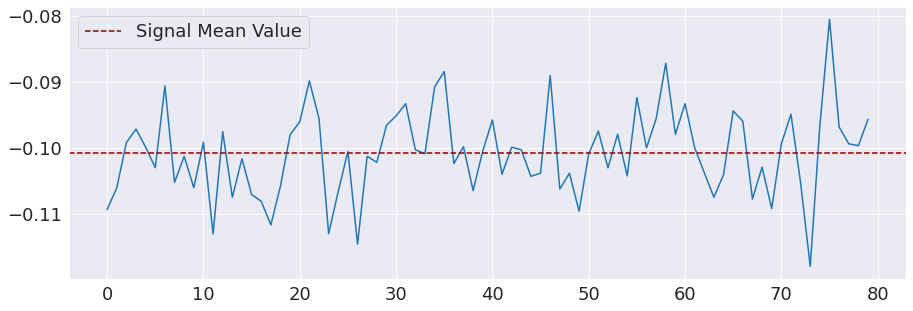

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y[pm_initial_segments['output_0'][0]][:80]);
plt.axhline(np.mean(y[pm_initial_segments['output_0'][0]][:80]), color='darkred', linestyle='--', label='Signal Mean Value');
plt.legend(fontsize=18);

In [ ]:
def mean_crossing(signal):
    mean_crossings = []
    for idx in range(0,len(signal)-1):
        if (signal[idx]-np.mean(signal))*(signal[idx+1]-np.mean(signal)) <= 0:
            mean_crossings.append(idx)
    
    return mean_crossings

In [ ]:
mean_crossings = mean_crossing(y[pm_initial_segments['output_0'][0]][:80])

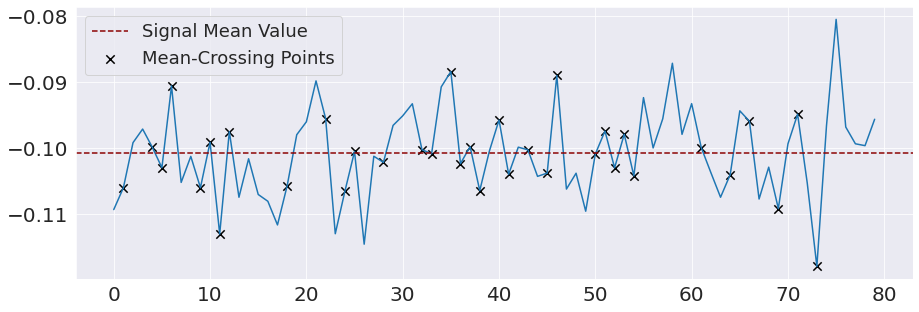

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y[pm_initial_segments['output_0'][0]][:80]);
plt.axhline(np.mean(y[pm_initial_segments['output_0'][0]][:80]), color='darkred', linestyle='--',label='Signal Mean Value');
plt.scatter(mean_crossings,y[mean_crossings],s=70,marker='x', color='black', label="Mean-Crossing Points");
plt.legend(fontsize=18);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

In [ ]:
def tc_func(mean_crossings):
    Tc = []
    for idx in range(0,len(mean_crossings)-1):
        Tc.append(mean_crossings[idx+1]-mean_crossings[idx])
        
    return Tc

In [ ]:
Tc = tc_func(mean_crossings)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



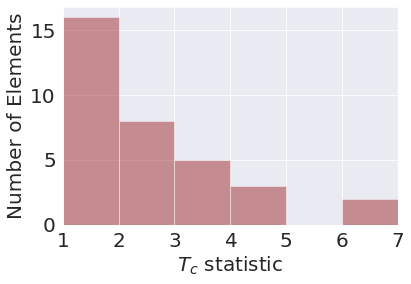

In [ ]:
sns.distplot(Tc, bins=6, kde=False, color='darkred');
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlim(1,7)
plt.xlabel("$T_{c}$"+" statistic", fontsize=20);
plt.ylabel("Number of Elements", fontsize=20);

In [ ]:
def lilliefors_test(Tc, N):
    """
    This function computes the Lilliefors
    statistical test for validating if
    the statistic Tc belongs to a exponential
    distribution.
    
    Arguments:
        Tc: an array of differential mean-crossing
        indexes
    """
    #Array for simulated Tc
    T_arr = range(0,N)
    
    #Estimated CDF
    f_hat = []
    
    #Interval Exponential Average
    lamb = 1/np.mean(Tc)
    
    #Theoretical CDF
    Ft = 1-np.exp(-lamb*T_arr)
    
    #Computed CDF
    for t in T_arr:
        a = []
        for tc in Tc:
            if tc <= t:
                a.append(1)
            else:
                a.append(0)
        f_hat.append(np.mean(a))
    
    #Lilliefors Computed Value
    Dt = np.max(np.abs(Ft-f_hat))
    
    return Dt, f_hat, Ft

In [ ]:
Dt, f_hat, Ft = lilliefors_test(Tc, N=30)

In [ ]:
Dt

0.09546225110623696

In [ ]:
Dc = 1.25/np.sqrt(len(Tc)-1)

In [ ]:
Dc

0.2175970699446223

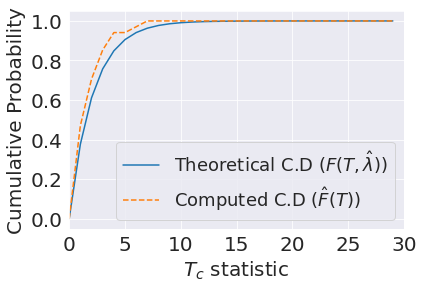

In [ ]:
plt.plot(Ft, label="Theoretical C.D ($F(T,\hat{\lambda})$)");
plt.plot(f_hat, label="Computed C.D ($\hat{F}(T)$)",linestyle='--');
plt.xlim([0,30])
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("$T_{c}$"+" statistic", fontsize=20);
plt.ylabel("Cumulative Probability", fontsize=20);
plt.legend(fontsize=18);

]Because $D_{t} < D_{c}$, one cannot refuse the hypothesis that

#### **5.1.2 Cumulative Distribution for an Active Signal**

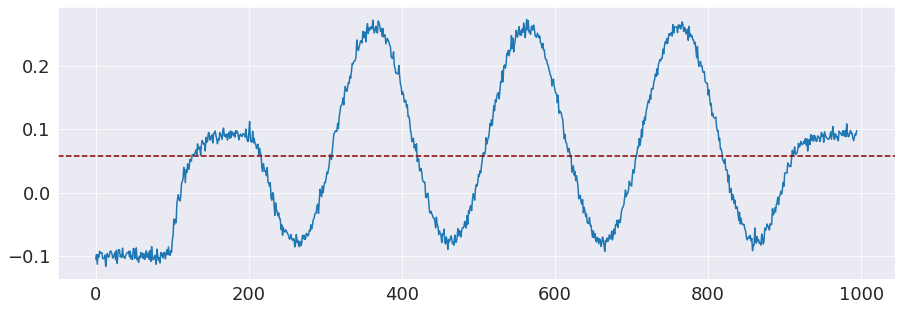

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y[MS.final_segments[9]])
plt.axhline(np.mean(y[MS.final_segments[9]]), color='darkred', linestyle='--')

In [ ]:
mean_crossings = mean_crossing(y[MS.final_segments[9]])

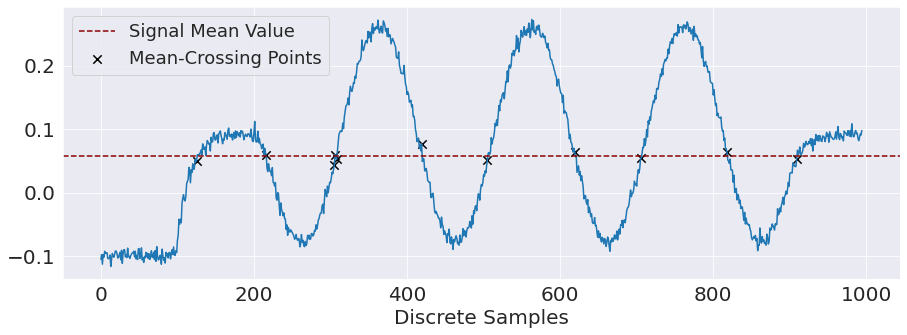

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y[MS.final_segments[9]])
plt.axhline(np.mean(y[MS.final_segments[9]]), color='darkred', linestyle='--', label='Signal Mean Value')
plt.scatter(mean_crossings,y[MS.final_segments[9]][mean_crossings],s=70,marker='x', color='black', label="Mean-Crossing Points")
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.legend(fontsize=18);

In [ ]:
Tc = tc_func(mean_crossings)

In [ ]:
Dt, f_hat, Ft = lilliefors_test(Tc, N=500)

In [ ]:
Dt

0.4618222632950603

Critical Value for a sample of length 10: 0.38 (Lilliefors table)

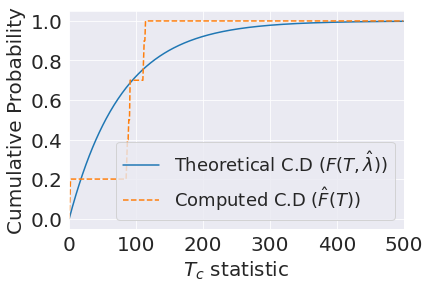

In [ ]:
plt.plot(Ft, label="Theoretical C.D ($F(T,\hat{\lambda})$)");
plt.plot(f_hat, label="Computed C.D ($\hat{F}(T)$)",linestyle='--');
plt.xlim([0,500])
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("$T_{c}$"+" statistic", fontsize=20);
plt.ylabel("Cumulative Probability", fontsize=20);
plt.legend(fontsize=18);

### **5.2 Let's see the algorithm Working on a Particular Interval**

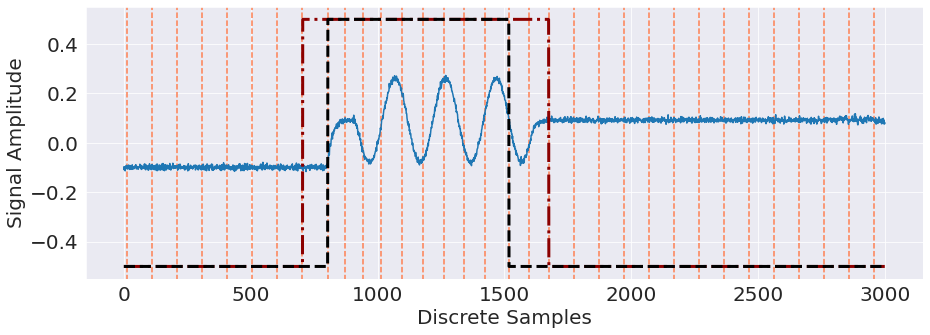

In [ ]:
change_points_ex = []
for idx in range(0,len(pm_initial_segments['output_0'])):
    if (np.max(pm_initial_segments['output_0'][idx]) >= 21000 and
        np.max(pm_initial_segments['output_0'][idx]) <= 24000):
    
        change_points_ex.append(np.max(pm_initial_segments['output_0'][idx]))
        
plt.figure(figsize=(15,5))

for cp in change_points_ex:
    plt.axvline(cp-21000,ymin=-0.5,ymax=1,color='coral', linestyle='--')
    
plt.plot(y[21000:24000]);
ks_indicating_example = MS.ks_indicating_sequences['output']['output_0'][21000:24000]
ts_indicating_example = MS.ts_indicating_sequences['output']['output_0'][21000:24000]

ks_indicating_example[np.argwhere(ks_indicating_example==0)] = -0.5
ks_indicating_example[np.argwhere(ks_indicating_example==1)] = 0.5
ts_indicating_example[np.argwhere(ts_indicating_example==0)] = -0.5
ts_indicating_example[np.argwhere(ts_indicating_example==1)] = 0.5

plt.plot(ts_indicating_example, color='darkred', linestyle='-.',linewidth=3)
plt.plot(ks_indicating_example, color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);

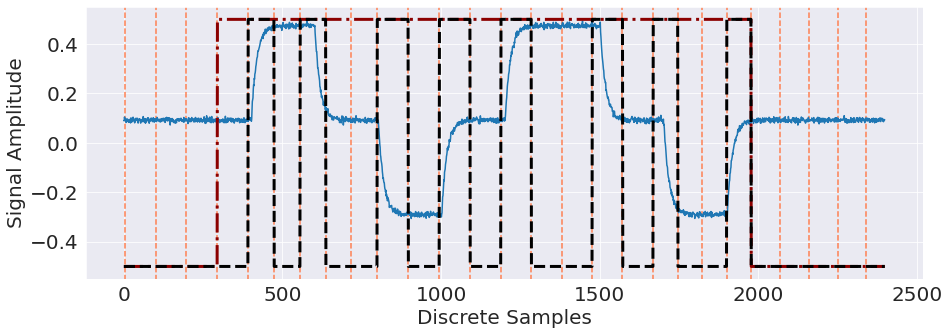

In [ ]:
change_points_ex = []
for idx in range(0,len(pm_initial_segments['output_0'])):
    if (np.max(pm_initial_segments['output_0'][idx]) >= 25100 and
        np.max(pm_initial_segments['output_0'][idx]) <= 27500):
    
        change_points_ex.append(np.max(pm_initial_segments['output_0'][idx]))
        
plt.figure(figsize=(15,5))

for cp in change_points_ex:
    plt.axvline(cp-25100,ymin=-0.5,ymax=1,color='coral', linestyle='--')
    
plt.plot(y[25100:27500]);
ks_indicating_example = MS.ks_indicating_sequences['output']['output_0'][25100:27500]
ts_indicating_example = MS.ts_indicating_sequences['output']['output_0'][25100:27500]

ks_indicating_example[np.argwhere(ks_indicating_example==0)] = -0.5
ks_indicating_example[np.argwhere(ks_indicating_example==1)] = 0.5
ts_indicating_example[np.argwhere(ts_indicating_example==0)] = -0.5
ts_indicating_example[np.argwhere(ts_indicating_example==1)] = 0.5

plt.plot(ts_indicating_example, color='darkred', linestyle='-.',linewidth=3)
plt.plot(ks_indicating_example, color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);